In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

In [ ]:
'''
from google.colab import drive
drive.mount('/content/drive')
'''

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
'''
consumer_df = pd.read_csv('/content/drive/MyDrive/Datathon/IrvineHacks_ConsumerData/ConsumerData.csv')
property_df = pd.read_csv('/content/drive/MyDrive/Datathon/IrvineHacks_PropertyAssessmentData/PropertyAssessmentData.csv')
zip_df = pd.read_csv('/content/drive/MyDrive/Datathon/IrvineHacks_ZipData/ZipData.csv')
'''


"\nconsumer_df = pd.read_csv('/content/drive/MyDrive/Datathon/IrvineHacks_ConsumerData/ConsumerData.csv')\nproperty_df = pd.read_csv('/content/drive/MyDrive/Datathon/IrvineHacks_PropertyAssessmentData/PropertyAssessmentData.csv')\nzip_df = pd.read_csv('/content/drive/MyDrive/Datathon/IrvineHacks_ZipData/ZipData.csv')\n"

In [55]:
consumer_df = pd.read_csv('/Users/thientoanvu/Desktop/Datathon-Atlantis/Melissa/IrvineHacks_ConsumerData/ConsumerData.csv')

In [58]:
consumer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2089792 entries, 0 to 2089791
Data columns (total 44 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   RecordID                    int64  
 1   MAK                         int64  
 2   BaseMak                     int64  
 3   Address                     object 
 4   City                        object 
 5   State                       object 
 6   Zipcode                     int64  
 7   Latitude                    float64
 8   Longitude                   float64
 9   OwnerRenter                 object 
 10  HomePurchaseDate            float64
 11  Charitable                  object 
 12  Health                      object 
 13  Political                   object 
 14  Religious                   object 
 15  Veteran                     object 
 16  MaritalStatus               object 
 17  SingleParent                object 
 18  NumberOfChildren            float64
 19  GrandChildren        

In [59]:
consumer_df.head()

,RecordID,MAK,BaseMak,Address,City,State,Zipcode,Latitude,Longitude,OwnerRenter,HomePurchaseDate,Charitable,Health,Political,Religious,Veteran,MaritalStatus,SingleParent,NumberOfChildren,GrandChildren,HouseholdSize,CatOwner,DogOwner,NetWorth,CreditCardUser,VehicleKnownOwnedNumber,SelfImprovement,MusicCollector,MovieCollector,Photography,AutoWork,Fishing,CampingHiking,HuntingShooting,Gardening,EnvironmentalIssues,HomeImprovement,HomeImprovementDIY,OutdoorsGrouping,InvestmentsForeign,BeautyCosmetics,TVCable,WirelessCellularPhoneOwner,EducationOnline
0,1,5690025747,0,322 E 2nd Ave,La Habra,CA,90631,33.929670,-117.942216,R,NaN,Y,N,N,Y,NaN,S,Y,2.0,NaN,5.0,NaN,NaN,4.0,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN,Y,Y,NaN
1,2,3719106908,9079495908,1220 W Lambert Rd,La Habra,CA,90631,33.923508,-117.960188,O,200409.0,Y,N,Y,N,NaN,S,NaN,NaN,NaN,1.0,NaN,NaN,7.0,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN,Y,NaN,Y,Y,NaN
2,3,8935162967,0,312 S Valencia St,La Habra,CA,90631,33.929476,-117.935571,O,198905.0,Y,N,Y,N,NaN,M,NaN,NaN,NaN,2.0,NaN,NaN,9.0,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,Y,NaN,Y,Y,NaN
3,4,9349379663,0,201 E Bridenbecker Ave,La Habra,CA,90631,33.928993,-117.944763,O,201309.0,Y,N,N,N,NaN,S,NaN,NaN,NaN,2.0,NaN,NaN,9.0,Y,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,Y,NaN,Y,NaN,Y,Y,NaN,Y,Y,NaN
4,5,9444642355,0,1126 Salvador St,Costa Mesa,CA,92626,33.675024,-117.904716,R,NaN,N,N,N,N,NaN,M,NaN,NaN,NaN,2.0,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,Y,Y,NaN


In [60]:
consumer_df.isnull().sum()

RecordID                            0
MAK                                 0
BaseMak                             0
Address                             0
City                                0
State                               0
Zipcode                             0
Latitude                            0
Longitude                           0
OwnerRenter                       234
HomePurchaseDate               856515
Charitable                          0
Health                              0
Political                           0
Religious                           0
Veteran                       1925702
MaritalStatus                  140409
SingleParent                  1863828
NumberOfChildren               906911
GrandChildren                 1914389
HouseholdSize                   23502
CatOwner                      1680557
DogOwner                      1525831
NetWorth                        23115
CreditCardUser                 259475
VehicleKnownOwnedNumber       1513660
SelfImprovem

In [61]:
non_predictor_columns = ['CreditCardUser', 'InvestmentsForeign','CatOwner', 'DogOwner', 'BeautyCosmetics', 'RecordID', 'MAK', 'BaseMak', 'Address', 'State', 'HomePurchaseDate', 'VehicleKnownOwnedNumber', 'WirelessCellularPhoneOwner', 'GrandChildren', 'EnvironmentalIssues' ,'EducationOnline']

In [144]:
consumer_df_new = consumer_df.drop(columns = non_predictor_columns)

In [145]:
consumer_df_new.shape

(2089792, 28)

In [146]:
consumer_df_new_1 = consumer_df_new.replace({None: -1}).dropna()

In [147]:
consumer_df_new_1.shape

(1182872, 28)

In [148]:
consumer_df_new_1.isnull().sum()

City                  0
Zipcode               0
Latitude              0
Longitude             0
OwnerRenter           0
Charitable            0
Health                0
Political             0
Religious             0
Veteran               0
MaritalStatus         0
SingleParent          0
NumberOfChildren      0
HouseholdSize         0
NetWorth              0
SelfImprovement       0
MusicCollector        0
MovieCollector        0
Photography           0
AutoWork              0
Fishing               0
CampingHiking         0
HuntingShooting       0
Gardening             0
HomeImprovement       0
HomeImprovementDIY    0
OutdoorsGrouping      0
TVCable               0
dtype: int64

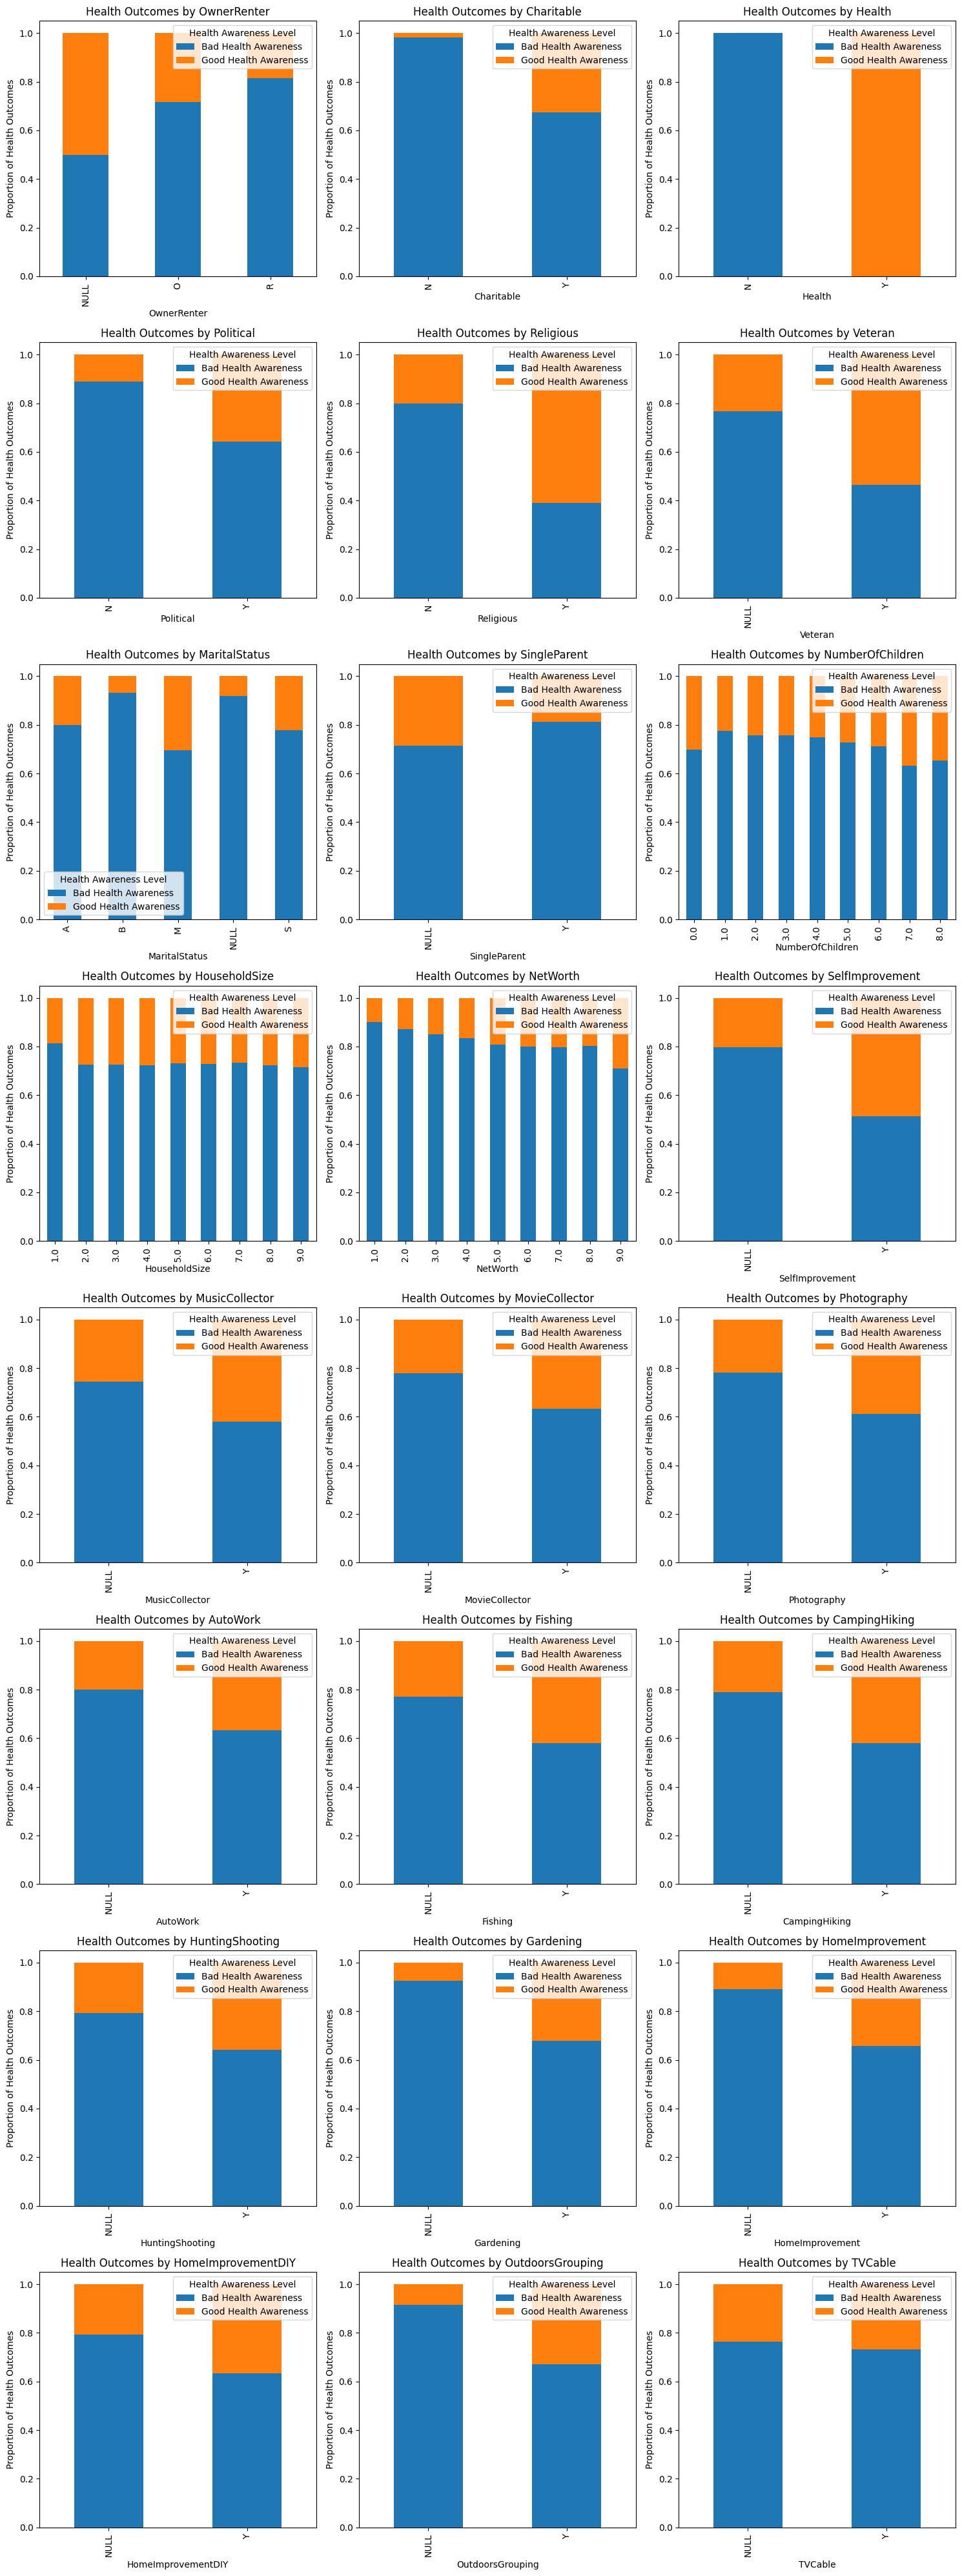

In [151]:
consumer_df_new_2 = consumer_df_new_1.drop(columns = ['City', 'Longitude', 'Latitude', 'Zipcode'])
consumer_df_new_2 = consumer_df_new_2.replace({-1: 'NULL'})

def plot_binary_health_relations(df, columns):
    # Determine the layout of the subplots
    num_columns = len(columns)
    num_rows = int(np.ceil(num_columns / 3))  # Adjust the number of rows here as needed
    fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))
    axes = axes.flatten()  # Flatten the axes array for easy iteration

    for i, column in enumerate(columns):
        health_proportions = df.groupby(column)['Health'].value_counts(normalize=True).unstack()
        health_proportions.plot(kind='bar', stacked=True, ax=axes[i])
        axes[i].set_title(f'Health Outcomes by {column}')
        axes[i].set_xlabel(column)
        axes[i].set_ylabel('Proportion of Health Outcomes')
        axes[i].legend(title='Health Awareness Level', labels=['Bad Health Awareness', 'Good Health Awareness'])

    plt.tight_layout()
    plt.show()

# Example usage:
columns = consumer_df_new_2.columns.tolist()
plot_binary_health_relations(consumer_df_new_2, columns)


In [135]:
consumer_df_new_1['OwnerRenter'] = consumer_df_new_1['OwnerRenter'].apply(lambda x:1 if x == 'O' else 0).astype(int)

In [136]:
consumer_df_new_1.replace({'Y':1, 'N':0}, inplace=True)
consumer_df_new_1.dtypes


City                   object
Zipcode                 int64
Latitude              float64
Longitude             float64
OwnerRenter             int64
Charitable              int64
Health                  int64
Political               int64
Religious               int64
Veteran                 int64
MaritalStatus          object
SingleParent            int64
NumberOfChildren      float64
HouseholdSize         float64
NetWorth              float64
SelfImprovement         int64
MusicCollector          int64
MovieCollector          int64
Photography             int64
AutoWork                int64
Fishing                 int64
CampingHiking           int64
HuntingShooting         int64
Gardening               int64
HomeImprovement         int64
HomeImprovementDIY      int64
OutdoorsGrouping        int64
TVCable                 int64
dtype: object

In [137]:
consumer_df_new_1['Zipcode'] = consumer_df_new_1['Zipcode'].astype(str)

In [138]:
consumer_df_new_1['MaritalStatus'] = consumer_df_new_1['MaritalStatus'].apply(lambda x: 1 if x == 'M' else (2 if x == 'S' else (3 if x == 'A' else 4))).astype(int)

In [139]:
consumer_df_new_1.head()

,City,Zipcode,Latitude,Longitude,OwnerRenter,Charitable,Health,Political,Religious,Veteran,MaritalStatus,SingleParent,NumberOfChildren,HouseholdSize,NetWorth,SelfImprovement,MusicCollector,MovieCollector,Photography,AutoWork,Fishing,CampingHiking,HuntingShooting,Gardening,HomeImprovement,HomeImprovementDIY,OutdoorsGrouping,TVCable
0,La Habra,90631,33.929670,-117.942216,0,1,0,0,1,-1,2,1,2.0,5.0,4.0,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,1,1
5,Costa Mesa,92626,33.690815,-117.934015,1,1,1,1,0,-1,1,-1,1.0,4.0,9.0,-1,-1,-1,1,1,-1,-1,-1,1,1,1,1,1
6,Costa Mesa,92626,33.689049,-117.903661,1,1,1,1,1,1,1,-1,0.0,2.0,9.0,-1,1,1,1,1,-1,-1,-1,1,1,1,1,1
7,Capistrano Beach,92624,33.462028,-117.673180,1,1,1,1,0,-1,1,-1,1.0,3.0,8.0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1
10,Costa Mesa,92626,33.695621,-117.897087,1,1,0,0,0,-1,1,-1,0.0,5.0,9.0,-1,1,-1,-1,-1,1,-1,1,-1,1,-1,1,1


In [140]:
consumer_df_new_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1182872 entries, 0 to 2089789
Data columns (total 28 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   City                1182872 non-null  object 
 1   Zipcode             1182872 non-null  object 
 2   Latitude            1182872 non-null  float64
 3   Longitude           1182872 non-null  float64
 4   OwnerRenter         1182872 non-null  int64  
 5   Charitable          1182872 non-null  int64  
 6   Health              1182872 non-null  int64  
 7   Political           1182872 non-null  int64  
 8   Religious           1182872 non-null  int64  
 9   Veteran             1182872 non-null  int64  
 10  MaritalStatus       1182872 non-null  int64  
 11  SingleParent        1182872 non-null  int64  
 12  NumberOfChildren    1182872 non-null  float64
 13  HouseholdSize       1182872 non-null  float64
 14  NetWorth            1182872 non-null  float64
 15  SelfImprovement

In [74]:
result_df = consumer_df_new_1

In [75]:
result_df.to_csv('melissaData.csv', index=False)

In [76]:
result_df.drop(columns = ['City', 'Longitude', 'Latitude'], inplace = True)

In [77]:
result_df = pd.get_dummies(result_df, columns=['Zipcode'], drop_first = True)
result_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1182872 entries, 0 to 2089789
Columns: 162 entries, OwnerRenter to Zipcode_92887
dtypes: float64(3), int64(21), uint8(138)
memory usage: 381.3 MB


In [78]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = result_df.drop(columns = 'Health')
y = result_df['Health']

X = scaler.fit_transform(X)

In [79]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [81]:
from sklearn.metrics import confusion_matrix, classification_report

print("Accuracy {} %".format( 100 * accuracy_score(y_pred, y_test)))


Accuracy 77.73757431066083 %


<AxesSubplot:>

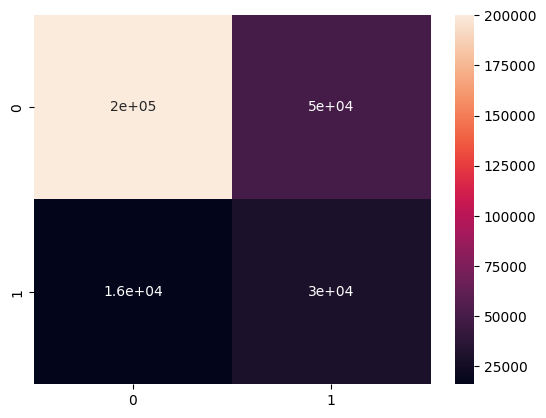

In [45]:
# Testing Set Performance
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True)


In [46]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.93      0.86    216346
           1       0.65      0.37      0.47     79372

    accuracy                           0.78    295718
   macro avg       0.72      0.65      0.67    295718
weighted avg       0.76      0.78      0.76    295718



In [47]:
result_df['Health'].value_counts()

0    867301
1    315571
Name: Health, dtype: int64

In [82]:
import tensorflow as tf
model = tf.keras.models.load_model('/Users/thientoanvu/Desktop/Datathon-Atlantis/Melissa/model.h5')

'''
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=500, activation='relu', input_shape=(161, )),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=500, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=500, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=500, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

optimizer = tf.keras.optimizers.Adam()

model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
epochs_hist = model.fit(X_train, y_train, epochs = 5, batch_size = 10000)
'''

/Users/thientoanvu/opt/anaconda3/lib/python3.9/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
89/89 ━━━━━━━━━━━━━━━━━━━━ 83s 882ms/step - accuracy: 0.7019 - loss: 0.6096
Epoch 2/5
89/89 ━━━━━━━━━━━━━━━━━━━━ 88s 955ms/step - accuracy: 0.7734 - loss: 0.4743
Epoch 3/5
89/89 ━━━━━━━━━━━━━━━━━━━━ 100s 1s/step - accuracy: 0.7773 - loss: 0.4652
Epoch 4/5
89/89 ━━━━━━━━━━━━━━━━━━━━ 76s 855ms/step - accuracy: 0.7774 - loss: 0.4622
Epoch 5/5
89/89 ━━━━━━━━━━━━━━━━━━━━ 79s 894ms/step - accuracy: 0.7784 - loss: 0.4606


In [83]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 500)            │        81,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 500)            │         2,000 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 500)            │       250,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 500)            │         2,000 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 500)            │       250,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 500)            │         2,000 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 500)            │       250,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 500)            │         2,000 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │           501 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,515,005 (9.59 MB)

 Trainable params: 837,001 (3.19 MB)

 Non-trainable params: 4,000 (15.62 KB)

 Optimizer params: 1,674,004 (6.39 MB)

In [84]:
y_pred = model.predict(X_test)


9242/9242 ━━━━━━━━━━━━━━━━━━━━ 33s 4ms/step


In [85]:
y_pred = (y_pred > 0.5)

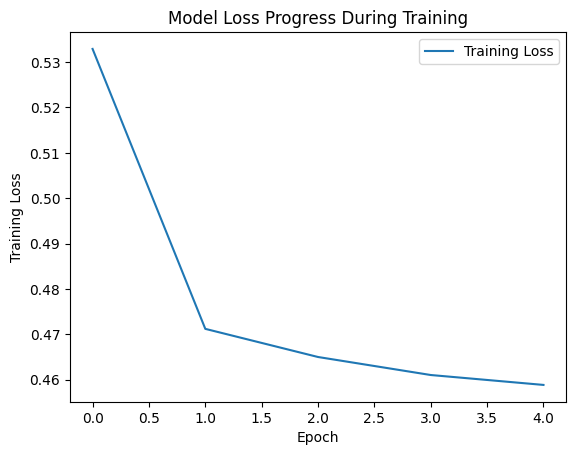

In [86]:
plt.plot(epochs_hist.history['loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend(['Training Loss'])

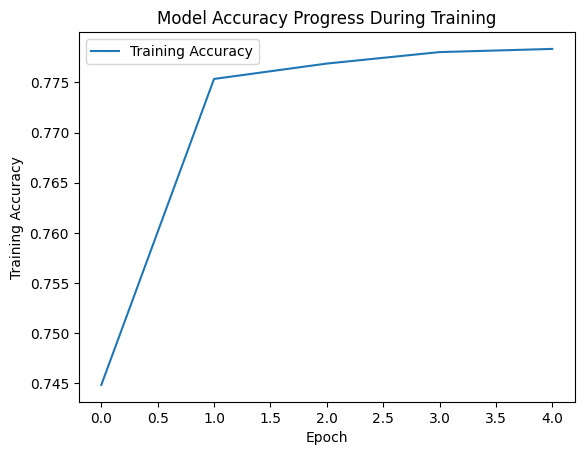

In [87]:
plt.plot(epochs_hist.history['accuracy'])
plt.title('Model Accuracy Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Accuracy')
plt.legend(['Training Accuracy'])

<AxesSubplot:>

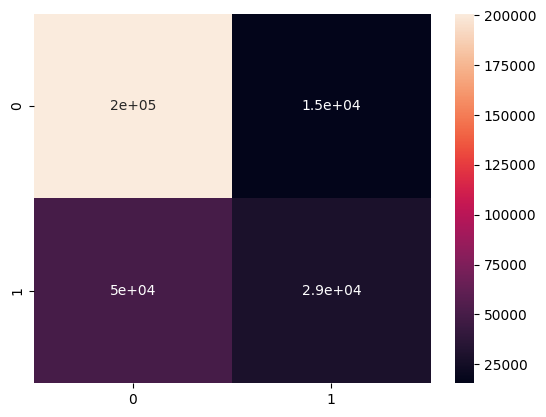

In [88]:
# Testing Set Performance
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)


In [89]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.93      0.86    216346
           1       0.65      0.37      0.47     79372

    accuracy                           0.78    295718
   macro avg       0.73      0.65      0.67    295718
weighted avg       0.76      0.78      0.76    295718



In [90]:
# Save the model to a file
model.save('model.h5')
